# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df=pd.read_csv(r'Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Descriptive analysis 

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.label.value_counts() #output values

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: xlabel='ph', ylabel='Density'>

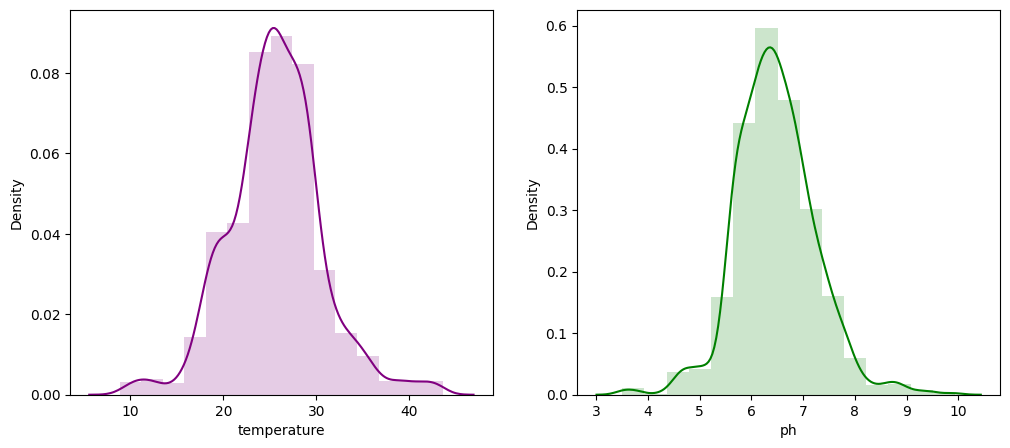

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

sn.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sn.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

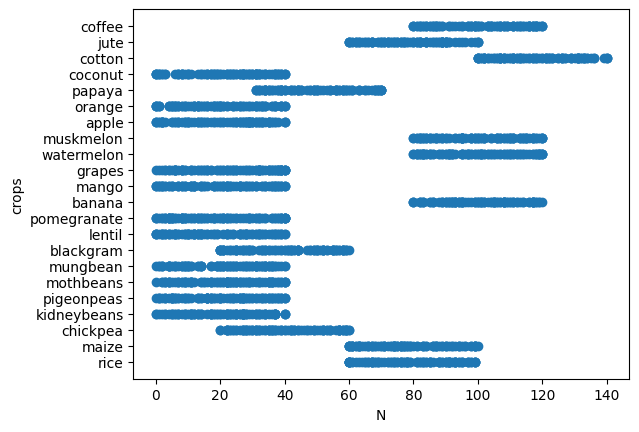

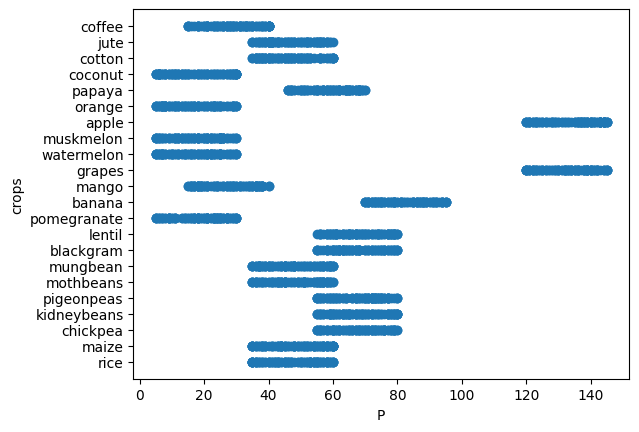

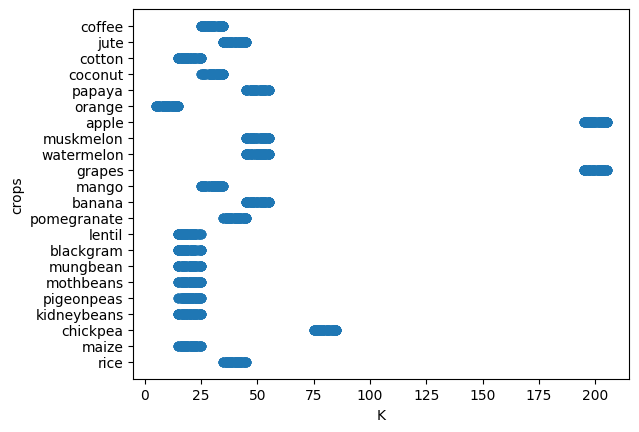

In [9]:
columns=['N','P','K']
for i in columns:
    plt.scatter(df[i],df.label)
    plt.xlabel(i)
    plt.ylabel('crops')
    plt.show()

<Axes: xlabel='count', ylabel='label'>

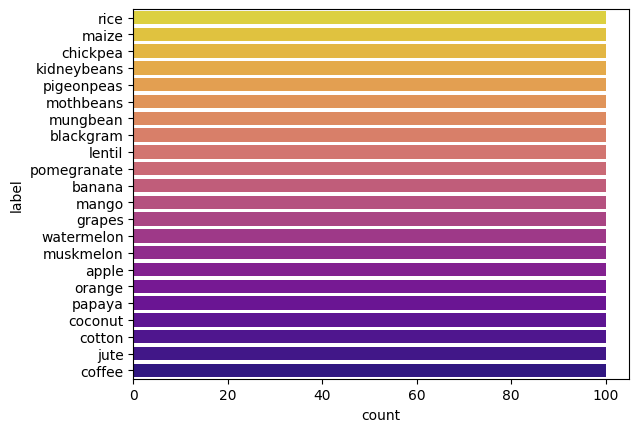

In [10]:
sn.countplot(y='label',data=df, palette="plasma_r")

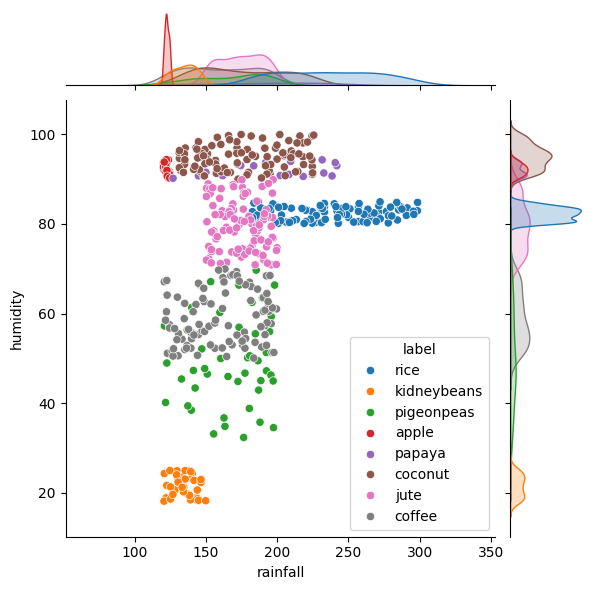

In [11]:
sn.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

<Axes: xlabel='P', ylabel='label'>

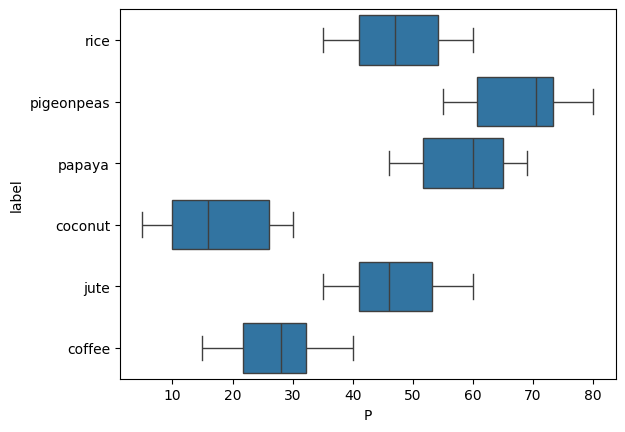

In [12]:
sn.boxplot(y='label',x='P',data=df[df['rainfall']>150])

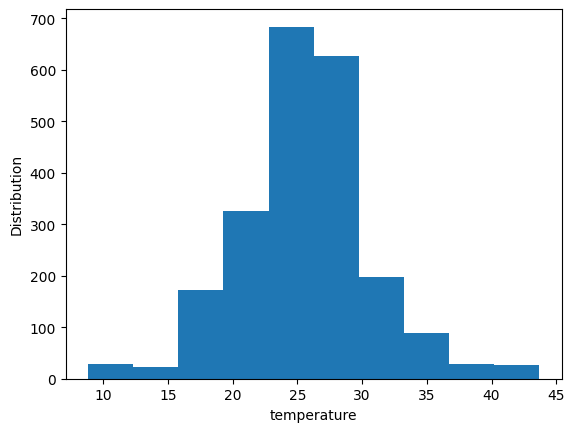

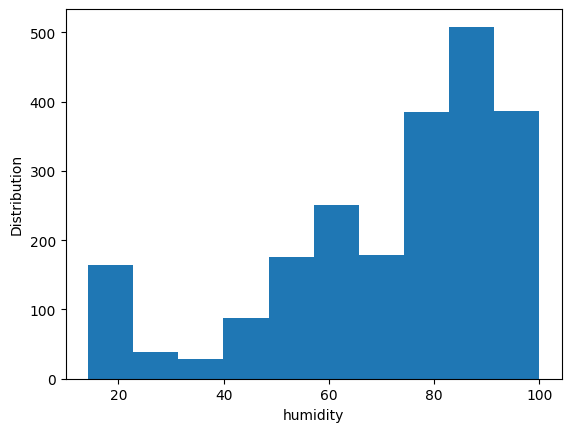

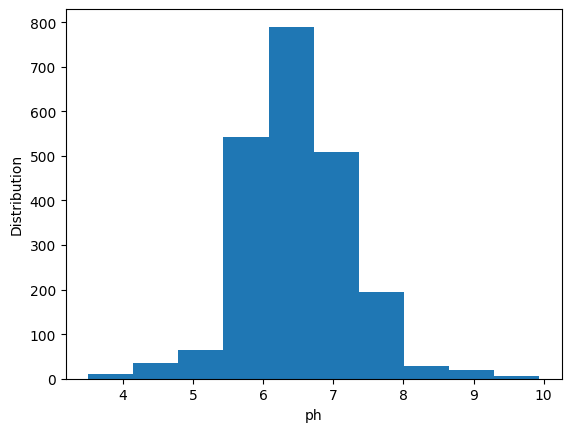

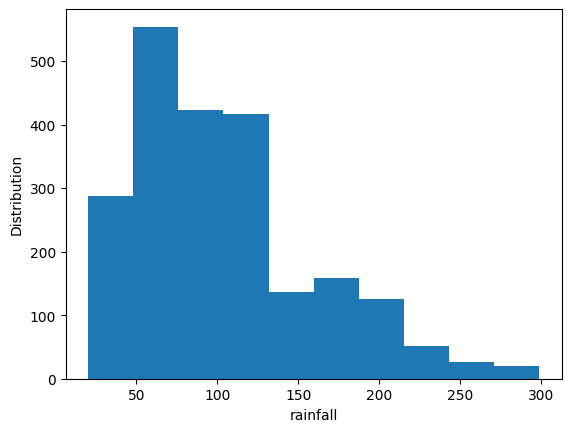

In [13]:
for i in df.select_dtypes(include='float64').columns:
    plt.hist(df[i])
    plt.ylabel('Distribution')
    plt.xlabel(i)
    plt.show()

# checking for correlation

In [14]:
df1=df.select_dtypes(include=['float64','int64'])
df1.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


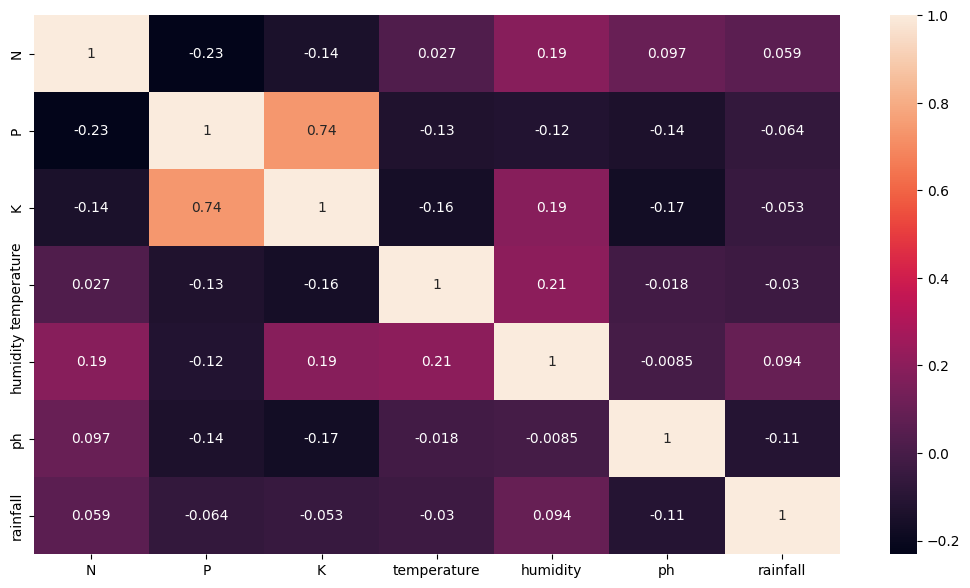

In [15]:
plt.figure(figsize=(13,7))
sn.heatmap(df1.corr(),annot=True)
plt.show()

# Train test split 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=df.drop('label',axis=1)
y=df.label

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

# Model Building using Random forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [20]:
model1=RandomForestClassifier(criterion='gini')

In [21]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
model1.score(x_test,y_test)

0.9954545454545455

In [23]:
from sklearn.model_selection import cross_val_score
avg=cross_val_score(model1,x_train,y_train,cv=5)

In [24]:
np.average(avg)

np.float64(0.9948863636363636)

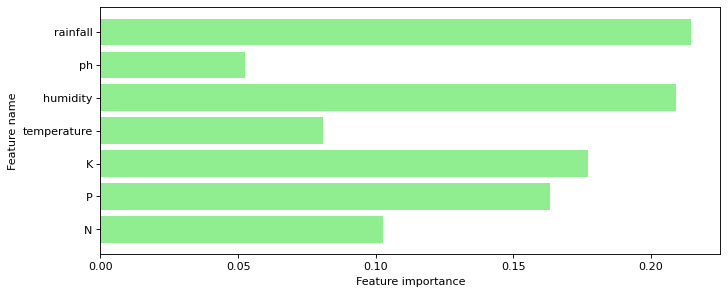

In [25]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(x_train.columns)
plt.barh(range(c_features), model1.feature_importances_,color='lightgreen')
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), x_train.columns)
plt.show()

# Hyper parameter tuning

In [26]:
models={
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion': ["gini", "entropy"],
            }
        },
     'Support Vector':{
         'model':SVC(),
         'params':{
             'C' : [1,5,10],
             'kernel': ['linear', 'poly', 'rbf']
            
         }
     },
     'LogisticRegression':{
         'model':LogisticRegression(),
         'params':{
             'C':[1,5]
         }
     }
      
    
}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
def find_best_model(x_train,y_train,models):
    scores=[]
    for model_name,config in models.items():
        grid_search=GridSearchCV(config['model'],config['params'],cv=5,return_train_score=False)
        grid_search.fit(x,y)
        scores.append(
            {
                'model':model_name,
                'best_score':grid_search.best_score_,
                'best_params':grid_search.best_params_
            }
        )
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(x_train,y_train,models)

,model,best_score,best_params
0,DecisionTree,0.986818,{'criterion': 'gini'}
1,Support Vector,0.985455,"{'C': 10, 'kernel': 'poly'}"
2,LogisticRegression,0.954545,{'C': 1}


# Classification Report 

In [29]:
from sklearn.metrics import classification_report 

In [30]:
y_predicted=model1.predict(x_test)
y_true=np.array(y_test)

In [31]:
clf_report=classification_report(y_true,y_predicted)
print(clf_report)



              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        25
   blackgram       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00        15
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        19
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        28
      papaya       1.00    

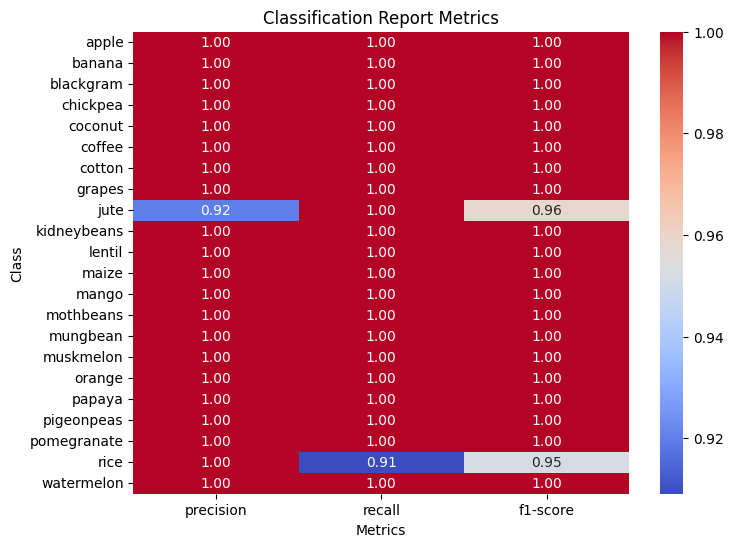

In [32]:
report = classification_report(y_true, y_predicted, output_dict=True)
df_report = pd.DataFrame(report).transpose()

class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

plt.figure(figsize=(8, 6))
sn.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()

# Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_true,y_predicted)

## plot confusion matrix

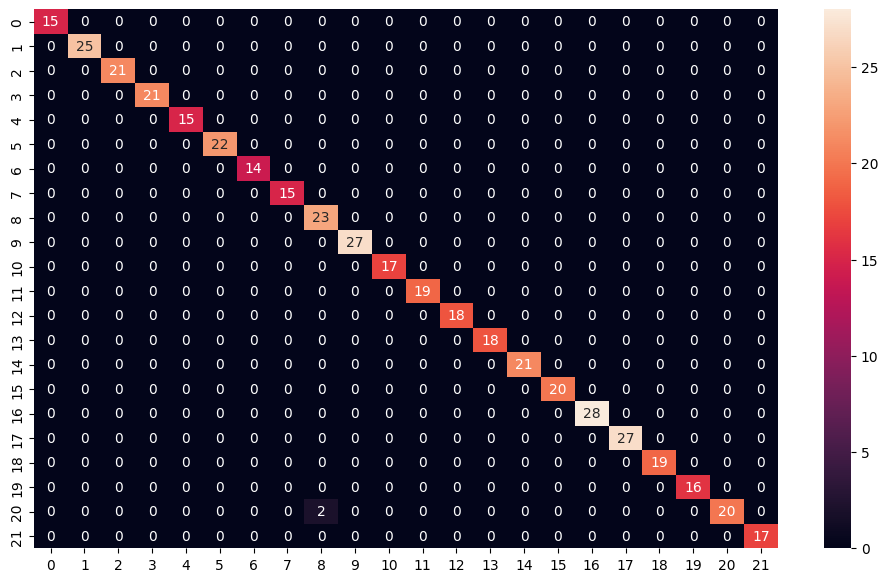

In [34]:
plt.figure(figsize=(12,7))
sn.heatmap(cn,annot=True)
plt.show()

# Output

In [35]:
model1.predict([[32,138,197,9.535586,80.731127,5.908724,69.441152]])

array(['grapes'], dtype=object)

In [36]:
model1.predict([[101,11,51,25.507370,84.243402,6.792036,44.206900]])

array(['watermelon'], dtype=object)

# Save Model

In [37]:
import pickle 
with open('soil_classification.pkl','wb') as f:
    pickle.dump(model1,f)


In [38]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))